<a href="https://colab.research.google.com/github/netaamz/DL-Model-for-Automated-Detection-of-Meniscus-Tears-in-Knee-MRI-Images/blob/main/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import drive

### **Loading the model**

In [2]:
drive.mount('/content/drive')
NUM_SLICES = 3 # options: {3, 17}
MODEL_PATH = '/content/drive/MyDrive/meniscus_project/best_results/coronal__dropout_0.4_lr_5e-4__bs_32_e_100_acc599.keras'
IMAGE_PATH = '/content/drive/MyDrive/meniscus_project/test/coronal/1242.npy'

Mounted at /content/drive


In [3]:
# Load the saved model ('.keras' or '.h5' file)
model = load_model(MODEL_PATH)

In [4]:

import numpy as np
def get_middle_slices(scan, num_slices=17):
    depth = scan.shape[0]  # The depth is the first dimension of the scan

    # Calculate the middle index
    middle = depth // 2

    # Calculate the starting and ending indices for the middle slices
    start = max(0, middle - num_slices // 2)
    end = min(depth, start + num_slices)  # Ensure you don't go beyond the total depth

    # Slice the scan to get the middle slices
    middle_slices = scan[start:end, :, :]

    return middle_slices

In [5]:
# Load and preprocess the new image
# Assuming the new image is in npy format
image_data = np.load(IMAGE_PATH)  # Shape: (30, 256, 256)

# Extract the middle slices
middle_idx = int(image_data.shape[0]/2)
middle_slices = get_middle_slices(image_data, num_slices=NUM_SLICES)

# Normalize the image data (scale pixel values to range [0, 1])
middle_slices_normalized = middle_slices / 255.0

# Reshape the slices into (1, 256, 256, 3)
middle_slices_normalized_fixed = np.moveaxis(middle_slices_normalized, 0, -1)  # Shape becomes (256, 256, 3)

# Add the batch dimension so the final shape is (1, 256, 256, 3)
middle_slices_normalized_fixed = np.expand_dims(middle_slices_normalized_fixed, axis=0)  # Shape: (1, 256, 256, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
Predicted result: Normal


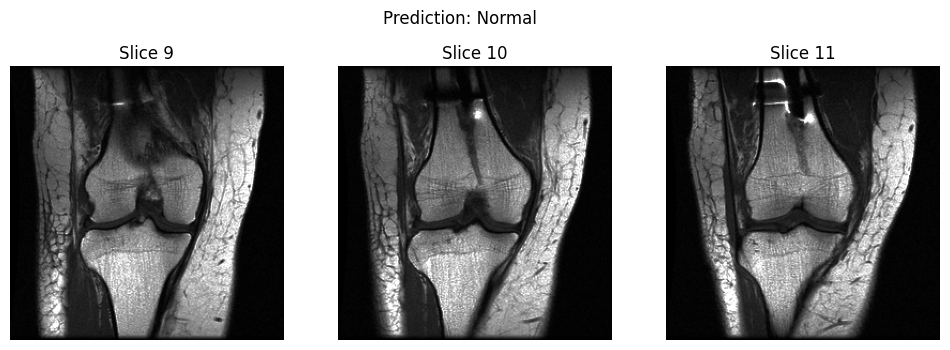

In [6]:
# Make the prediction using the loaded model
ypred = model.predict(middle_slices_normalized_fixed)

# Interpret the prediction
probability_of_tear = ypred[0][0]

# Set a threshold to classify as tear or no tear
threshold = 0.5
predicted_class = 1 if probability_of_tear > threshold else 0  # 1 = tear, 0 = no tear

# Define the labels
labels = ['Normal', 'Tear']

# Print the prediction result
print(f"Predicted result: {labels[predicted_class]}")

# Display the slices alongside the prediction result
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axs[i].imshow(middle_slices_normalized[i], cmap='gray')
    axs[i].set_title(f'Slice {middle_idx - 1 + i}')
    axs[i].axis('off')

plt.suptitle(f"Prediction: {labels[predicted_class]}")
plt.show()
